In [1]:
import geopandas as gpd
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import re

In [2]:
# Función para eliminar acentos y convertir a minúsculas
def remove_accents(text):
    # Mapeo de caracteres acentuados a sus equivalentes sin acentos
    accents_mapping = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'a', 'É': 'e', 'Í': 'i', 'Ó': 'o', 'Ú': 'u',
        'ñ': 'n', 'Ñ': 'n'
    }
    # Usar re.sub para reemplazar caracteres con acentos
    for accented_char, plain_char in accents_mapping.items():
        text = re.sub(accented_char, plain_char, text)
    # Convertir a minúsculas
    return text.lower()

In [3]:
df = pd.read_csv('../input_data/data metro cdmx 2022-2024-12-04.csv')

# Aplicar la función a la columna
df['estacion'] = df['estacion'].apply(remove_accents)
#df = df[df['anio']== 2024]
df.head()

,fecha,anio,mes,linea,estacion,afluencia,temporal_fecha,..anio_fecha
0,2022-01-01,2022,Enero,Línea 1,balbuena,2715,2022-01,2022
1,2022-01-01,2022,Enero,Línea 1,balderas,5973,2022-01,2022
2,2022-01-01,2022,Enero,Línea 1,boulevard puerto aereo,5633,2022-01,2022
3,2022-01-01,2022,Enero,Línea 1,candelaria,17059,2022-01,2022
4,2022-01-01,2022,Enero,Línea 1,chapultepec,11955,2022-01,2022


In [4]:
df_agg = df.groupby('estacion').agg({'afluencia':'count'})
df_agg.reset_index(inplace=True)
df_agg.head()
df_agg[df_agg['estacion'] == 'pantitlan']

,estacion,afluencia
106,pantitlan,3160


In [5]:
gdf_puntos = gpd.read_file('../input_data/metro_shp/stcmetro_shp/STC_Metro_estaciones_utm14n.shp',
                              crs='EPSG:4326')
# Crear nuevas columnas para latitud y longitud
gdf_puntos['longitude'] = gdf_puntos.geometry.x  # Longitud (coordenada X)
gdf_puntos['latitude'] = gdf_puntos.geometry.y  # Latitud (coordenada Y)
# Aplicar la función a la columna
gdf_puntos['NOMBRE'] = gdf_puntos['NOMBRE'].apply(remove_accents)

print(gdf_puntos.shape)
gdf_puntos.head()

(195, 12)


,SISTEMA,NOMBRE,LINEA,EST,CVE_EST,CVE_EOD17,TIPO,ALCALDIAS,AÑO,geometry,longitude,latitude
0,STC Metro,pantitlan,01,01,STC0101,05014,Terminal / Transbordo,Venustiano Carranza,1984,POINT Z (-99.07474 19.41633 0.00000),-99.074736,19.416334
1,STC Metro,zaragoza,01,02,STC0102,05020,Intermedia,Venustiano Carranza,1969,POINT Z (-99.08229 19.41192 0.00000),-99.082289,19.411920
2,STC Metro,gomez farias,01,03,STC0103,05007,Intermedia,Venustiano Carranza,1969,POINT Z (-99.09021 19.41648 0.00000),-99.090210,19.416478
3,STC Metro,boulevard puerto aereo,01,04,STC0104,05003,Intermedia,Venustiano Carranza,1969,POINT Z (-99.09626 19.41994 0.00000),-99.096259,19.419942
4,STC Metro,balbuena,01,05,STC0105,05001,Intermedia,Venustiano Carranza,1969,POINT Z (-99.10277 19.42336 0.00000),-99.102774,19.423355


In [6]:
join_gdf = gdf_puntos.merge(df_agg, left_on = 'NOMBRE', right_on = 'estacion', how ='left')
print(join_gdf.shape)
join_gdf.head()

(195, 14)


,SISTEMA,NOMBRE,LINEA,EST,CVE_EST,CVE_EOD17,TIPO,ALCALDIAS,AÑO,geometry,longitude,latitude,estacion,afluencia
0,STC Metro,pantitlan,01,01,STC0101,05014,Terminal / Transbordo,Venustiano Carranza,1984,POINT Z (-99.07474 19.41633 0.00000),-99.074736,19.416334,pantitlan,3160.0
1,STC Metro,zaragoza,01,02,STC0102,05020,Intermedia,Venustiano Carranza,1969,POINT Z (-99.08229 19.41192 0.00000),-99.082289,19.411920,zaragoza,790.0
2,STC Metro,gomez farias,01,03,STC0103,05007,Intermedia,Venustiano Carranza,1969,POINT Z (-99.09021 19.41648 0.00000),-99.090210,19.416478,gomez farias,790.0
3,STC Metro,boulevard puerto aereo,01,04,STC0104,05003,Intermedia,Venustiano Carranza,1969,POINT Z (-99.09626 19.41994 0.00000),-99.096259,19.419942,boulevard puerto aereo,790.0
4,STC Metro,balbuena,01,05,STC0105,05001,Intermedia,Venustiano Carranza,1969,POINT Z (-99.10277 19.42336 0.00000),-99.102774,19.423355,balbuena,790.0


In [7]:
gdf_lineas = gpd.read_file('../input_data/metro_shp/stcmetro_shp/STC_Metro_lineas_utm14n.shp')
gdf_lineas = gdf_lineas.to_crs("EPSG:4326")
gdf_lineas.head()

,SISTEMA,LINEA,RUTA,geometry
0,STC Metro,1,Observatorio - Pantitlàn,"LINESTRING Z (-99.20040 19.39828 0.00000, -99...."
1,STC Metro,2,Cuatro Caminos - Tasqueña,"LINESTRING Z (-99.21584 19.45959 0.00000, -99...."
2,STC Metro,3,Indios Verdes - Universidad,"LINESTRING Z (-99.11951 19.49534 0.00000, -99...."
3,STC Metro,4,Martín Carrera - Santa Anita,"LINESTRING Z (-99.12170 19.40289 0.00000, -99...."
4,STC Metro,5,Politecnico - Pantitlán,"LINESTRING Z (-99.14921 19.50068 0.00000, -99...."


<Axes: >

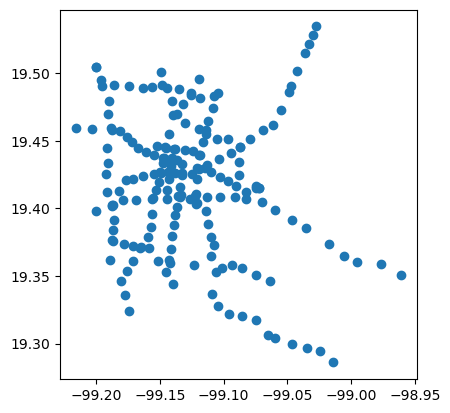

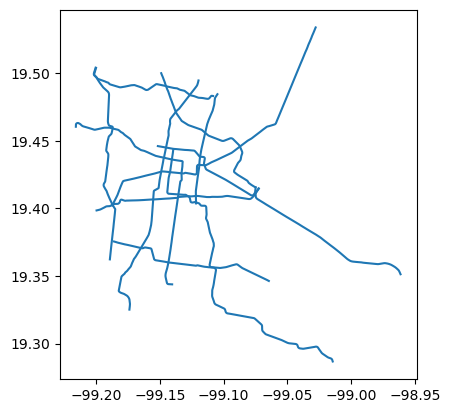

In [8]:
gdf_puntos.plot()
gdf_lineas.plot()

In [9]:
# Crear el grafo
metro_graph = nx.Graph()

# Agregar nodos (estaciones) con atributos de afluencia
for _, row in join_gdf.iterrows():
    metro_graph.add_node(
        row['CVE_EST'], 
        name=row['NOMBRE'], 
        pos=(row['longitude'], row['latitude']),
        passenger_count=row['afluencia']
    )

In [10]:
gdf_lineas.head(14)
#join_gdf.head()

,SISTEMA,LINEA,RUTA,geometry
0,STC Metro,1,Observatorio - Pantitlàn,"LINESTRING Z (-99.20040 19.39828 0.00000, -99...."
1,STC Metro,2,Cuatro Caminos - Tasqueña,"LINESTRING Z (-99.21584 19.45959 0.00000, -99...."
2,STC Metro,3,Indios Verdes - Universidad,"LINESTRING Z (-99.11951 19.49534 0.00000, -99...."
3,STC Metro,4,Martín Carrera - Santa Anita,"LINESTRING Z (-99.12170 19.40289 0.00000, -99...."
4,STC Metro,5,Politecnico - Pantitlán,"LINESTRING Z (-99.14921 19.50068 0.00000, -99...."
5,STC Metro,6,El Rosario - Martín Carrera,"LINESTRING Z (-99.19977 19.50463 0.00000, -99...."
6,STC Metro,7,El Rosario - Barranca del Muerto,"LINESTRING Z (-99.20012 19.50474 0.00000, -99...."
7,STC Metro,8,Garibaldi - Constitución de 1917,"LINESTRING Z (-99.13900 19.44400 0.00000, -99...."
8,STC Metro,9,Tacubaya - Pantitlán,"LINESTRING Z (-99.07221 19.41535 0.00000, -99...."
9,STC Metro,A,Pantitlán - La Paz,"LINESTRING Z (-99.07192 19.41530 0.00000, -99...."


In [11]:
from shapely.geometry import LineString

def connect_metro_stations(stations_gdf, lines_gdf, line_col, station_id_col):
    """
    Connects metro stations based on their corresponding line and calculates 
    average attributes for each connection.
    
    Parameters:
        stations_gdf (GeoDataFrame): GeoDataFrame containing metro stations with geometry,
                                     latitude, longitude, and attributes like passenger flow.
        lines_gdf (GeoDataFrame): GeoDataFrame containing metro lines as geometries.
        line_col (str): Column name in both DataFrames that associates stations with lines.
        station_id_col (str): Unique identifier for each station.
        
    Returns:
        GeoDataFrame: A new GeoDataFrame representing the connections between stations
                      with calculated average attributes.
    """
    connections = []

    for line_id in lines_gdf[line_col].unique():
        # Filtrar estaciones y líneas según el identificador de línea
        line_stations = stations_gdf[stations_gdf[line_col] == line_id].sort_values(by=station_id_col)
        line_geometry = lines_gdf[lines_gdf[line_col] == line_id].geometry.iloc[0]

        # Conectar estaciones secuencialmente
        for i in range(len(line_stations) - 1):
            station_a = line_stations.iloc[i]
            station_b = line_stations.iloc[i + 1]

            # Calcular línea entre estaciones
            segment_geom = LineString([station_a.geometry, station_b.geometry])

            # Calcular promedio de atributos
            avg_passenger_flow = (station_a['afluencia'] + station_b['afluencia']) / 2

            # Crear registro de conexión
            connections.append({
                'line': line_id,
                'from_station': station_a[station_id_col],
                'to_station': station_b[station_id_col],
                'avg_afluencia': avg_passenger_flow,
                'geometry': segment_geom
            })

    # Crear un GeoDataFrame con las conexiones
    connections_gdf = gpd.GeoDataFrame(connections, crs=stations_gdf.crs)

    return connections_gdf

In [12]:
#gdf_lineas.head()
gdf_lineas["LINEA"] = gdf_lineas["LINEA"].replace({'1':'01', '2':'02','3':'03',
                                                   '4':'04', '5':'05','6':'06',
                                                   '7':'07', '8':'08','9':'09'})
gdf_lineas.head()
#join_gdf.head()

,SISTEMA,LINEA,RUTA,geometry
0,STC Metro,01,Observatorio - Pantitlàn,"LINESTRING Z (-99.20040 19.39828 0.00000, -99...."
1,STC Metro,02,Cuatro Caminos - Tasqueña,"LINESTRING Z (-99.21584 19.45959 0.00000, -99...."
2,STC Metro,03,Indios Verdes - Universidad,"LINESTRING Z (-99.11951 19.49534 0.00000, -99...."
3,STC Metro,04,Martín Carrera - Santa Anita,"LINESTRING Z (-99.12170 19.40289 0.00000, -99...."
4,STC Metro,05,Politecnico - Pantitlán,"LINESTRING Z (-99.14921 19.50068 0.00000, -99...."


In [13]:
join_gdf.head()

,SISTEMA,NOMBRE,LINEA,EST,CVE_EST,CVE_EOD17,TIPO,ALCALDIAS,AÑO,geometry,longitude,latitude,estacion,afluencia
0,STC Metro,pantitlan,01,01,STC0101,05014,Terminal / Transbordo,Venustiano Carranza,1984,POINT Z (-99.07474 19.41633 0.00000),-99.074736,19.416334,pantitlan,3160.0
1,STC Metro,zaragoza,01,02,STC0102,05020,Intermedia,Venustiano Carranza,1969,POINT Z (-99.08229 19.41192 0.00000),-99.082289,19.411920,zaragoza,790.0
2,STC Metro,gomez farias,01,03,STC0103,05007,Intermedia,Venustiano Carranza,1969,POINT Z (-99.09021 19.41648 0.00000),-99.090210,19.416478,gomez farias,790.0
3,STC Metro,boulevard puerto aereo,01,04,STC0104,05003,Intermedia,Venustiano Carranza,1969,POINT Z (-99.09626 19.41994 0.00000),-99.096259,19.419942,boulevard puerto aereo,790.0
4,STC Metro,balbuena,01,05,STC0105,05001,Intermedia,Venustiano Carranza,1969,POINT Z (-99.10277 19.42336 0.00000),-99.102774,19.423355,balbuena,790.0


  line from_station to_station  avg_afluencia  \
0   01      STC0101    STC0102         1975.0   
1   01      STC0102    STC0103          790.0   
2   01      STC0103    STC0104          790.0   
3   01      STC0104    STC0105          790.0   
4   01      STC0105    STC0106          790.0   

                                            geometry  
0  LINESTRING Z (-99.07474 19.41633 0.00000, -99....  
1  LINESTRING Z (-99.08229 19.41192 0.00000, -99....  
2  LINESTRING Z (-99.09021 19.41648 0.00000, -99....  
3  LINESTRING Z (-99.09626 19.41994 0.00000, -99....  
4  LINESTRING Z (-99.10277 19.42336 0.00000, -99....  


<Axes: >

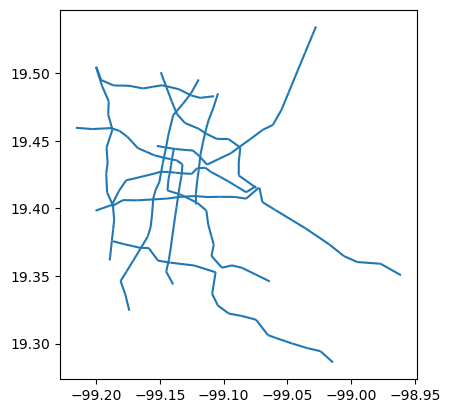

In [14]:
# Crear conexiones entre estaciones
connections_gdf = connect_metro_stations(
    stations_gdf=join_gdf,
    lines_gdf=gdf_lineas,
    line_col='LINEA',
    station_id_col='CVE_EST'
)

#connections_gdf = connect_metro_stations(
#    stations_gdf=join_gdf,
#    lines_gdf=gdf_puntos,
#    line_col='LINEA',
#    station_id_col='CVE_EST'
#)

# Visualizar las conexiones
print(connections_gdf.head())

# Graficar las conexiones
connections_gdf.plot()

In [15]:
connections_gdf.head()

,line,from_station,to_station,avg_afluencia,geometry
0,01,STC0101,STC0102,1975.0,"LINESTRING Z (-99.07474 19.41633 0.00000, -99...."
1,01,STC0102,STC0103,790.0,"LINESTRING Z (-99.08229 19.41192 0.00000, -99...."
2,01,STC0103,STC0104,790.0,"LINESTRING Z (-99.09021 19.41648 0.00000, -99...."
3,01,STC0104,STC0105,790.0,"LINESTRING Z (-99.09626 19.41994 0.00000, -99...."
4,01,STC0105,STC0106,790.0,"LINESTRING Z (-99.10277 19.42336 0.00000, -99...."


In [16]:
### Crear un diccionario para trasladar from_station y to_station a nombre de estaciones
def create_station_dict(gdf, id_col, name_col):
    """
    Creates a dictionary mapping station IDs to station names from a GeoDataFrame.

    Parameters:
        gdf (GeoDataFrame): GeoDataFrame containing station data.
        id_col (str): Column name with unique station IDs.
        name_col (str): Column name with station names.

    Returns:
        dict: Dictionary mapping station IDs to station names.
    """
    return gdf.set_index(id_col)[name_col].to_dict()

In [17]:
station_dict = create_station_dict(join_gdf, id_col='CVE_EST', name_col='NOMBRE')
# Imprimir el resultado
print(station_dict)

{'STC0101': 'pantitlan', 'STC0102': 'zaragoza', 'STC0103': 'gomez farias', 'STC0104': 'boulevard puerto aereo', 'STC0105': 'balbuena', 'STC0106': 'moctezuma', 'STC0107': 'san lazaro', 'STC0108': 'candelaria', 'STC0109': 'merced', 'STC0110': 'pino suarez', 'STC0111': 'isabel la catolica', 'STC0112': 'salto del agua', 'STC0113': 'balderas', 'STC0114': 'cuauhtemoc', 'STC0115': 'insurgentes', 'STC0116': 'sevilla', 'STC0117': 'chapultepec', 'STC0118': 'juanacatlan', 'STC0119': 'tacubaya', 'STC0120': 'observatorio', 'STC0201': 'cuatro caminos', 'STC0202': 'panteones', 'STC0203': 'tacuba', 'STC0204': 'cuitlahuac', 'STC0205': 'popotla', 'STC0206': 'colegio militar', 'STC0207': 'normal', 'STC0208': 'san cosme', 'STC0209': 'revolucion', 'STC0210': 'hidalgo', 'STC0211': 'bellas artes', 'STC0212': 'allende', 'STC0213': 'zocalo/tenochtitlan', 'STC0214': 'pino suarez', 'STC0215': 'san antonio abad', 'STC0216': 'chabacano', 'STC0217': 'viaducto', 'STC0218': 'xola', 'STC0219': 'villa de cortes', 'STC0

In [18]:
connections_gdf['line'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', 'A', 'B',
       '12'], dtype=object)

In [19]:
connections_gdf[connections_gdf['line']=='02']
connections_gdf['from_name'] = connections_gdf['from_station'].map(station_dict).fillna("Desconocido")
connections_gdf['to_name'] = connections_gdf['to_station'].map(station_dict).fillna("Desconocido")
connections_gdf.head()


,line,from_station,to_station,avg_afluencia,geometry,from_name,to_name
0,01,STC0101,STC0102,1975.0,"LINESTRING Z (-99.07474 19.41633 0.00000, -99....",pantitlan,zaragoza
1,01,STC0102,STC0103,790.0,"LINESTRING Z (-99.08229 19.41192 0.00000, -99....",zaragoza,gomez farias
2,01,STC0103,STC0104,790.0,"LINESTRING Z (-99.09021 19.41648 0.00000, -99....",gomez farias,boulevard puerto aereo
3,01,STC0104,STC0105,790.0,"LINESTRING Z (-99.09626 19.41994 0.00000, -99....",boulevard puerto aereo,balbuena
4,01,STC0105,STC0106,790.0,"LINESTRING Z (-99.10277 19.42336 0.00000, -99....",balbuena,moctezuma


In [20]:
def create_networkx_graph_from_connections(stations_gdf, connections_gdf, station_id_col, afluencia_col):
    """
    Creates a NetworkX graph from a GeoDataFrame of stations and their connections.

    Parameters:
        stations_gdf (GeoDataFrame): GeoDataFrame containing station data, including geometry and afluencia.
        connections_gdf (GeoDataFrame): GeoDataFrame containing connections between stations with geometry.
        station_id_col (str): Column in both GeoDataFrames with the unique station identifier.
        afluencia_col (str): Column in the stations GeoDataFrame with passenger flow data.

    Returns:
        NetworkX Graph: A graph where nodes are stations and edges are the connections.
    """

    # Crear grafo vacío
    G = nx.Graph()

    # Agregar nodos al grafo con atributos desde stations_gdf
    for _, station in stations_gdf.iterrows():
        G.add_node(
            station[station_id_col],
            geometry=station.geometry,
            afluencia=station[afluencia_col],
            **station.drop([station_id_col, 'geometry', afluencia_col]).to_dict()
        )

    # Agregar aristas al grafo desde connections_gdf
    for _, connection in connections_gdf.iterrows():
        G.add_edge(
            connection['from_name'],
            connection['to_name'],
            weight=connection['avg_afluencia'],  # Usar el peso promedio de afluencia
            geometry=connection.geometry,
            line=connection['line']
        )

    return G

In [21]:
# Crear el grafo a partir de las estaciones y conexiones
metro_graph = create_networkx_graph_from_connections(
    stations_gdf=join_gdf,
    connections_gdf=connections_gdf,
    station_id_col='NOMBRE',
    afluencia_col='afluencia'
)

# Imprimir un resumen del grafo
print(f"Nodos: {metro_graph.number_of_nodes()}, Aristas: {metro_graph.number_of_edges()}")

# Ver las propiedades de un nodo
node_data = list(metro_graph.nodes(data=True))
print("Ejemplo de nodo:", node_data[0])

# Ver las propiedades de una arista
edge_data = list(metro_graph.edges(data=True))
print("Ejemplo de arista:", edge_data[0])

Nodos: 163, Aristas: 183
Ejemplo de nodo: ('pantitlan', {'geometry': <POINT Z (-99.1 19.4 0)>, 'afluencia': 3160.0, 'SISTEMA': 'STC Metro', 'LINEA': 'A', 'EST': '01', 'CVE_EST': 'STCLA01', 'CVE_EOD17': '05171', 'TIPO': 'Terminal / Transbordo', 'ALCALDIAS': 'Iztacalco', 'AÑO': 1991, 'longitude': -99.07192293715731, 'latitude': 19.415297524541934, 'estacion': 'pantitlan'})
Ejemplo de arista: ('pantitlan', 'zaragoza', {'weight': 1975.0, 'geometry': <LINESTRING Z (-99.1 19.4 0, -99.1 19.4 0)>, 'line': '01'})


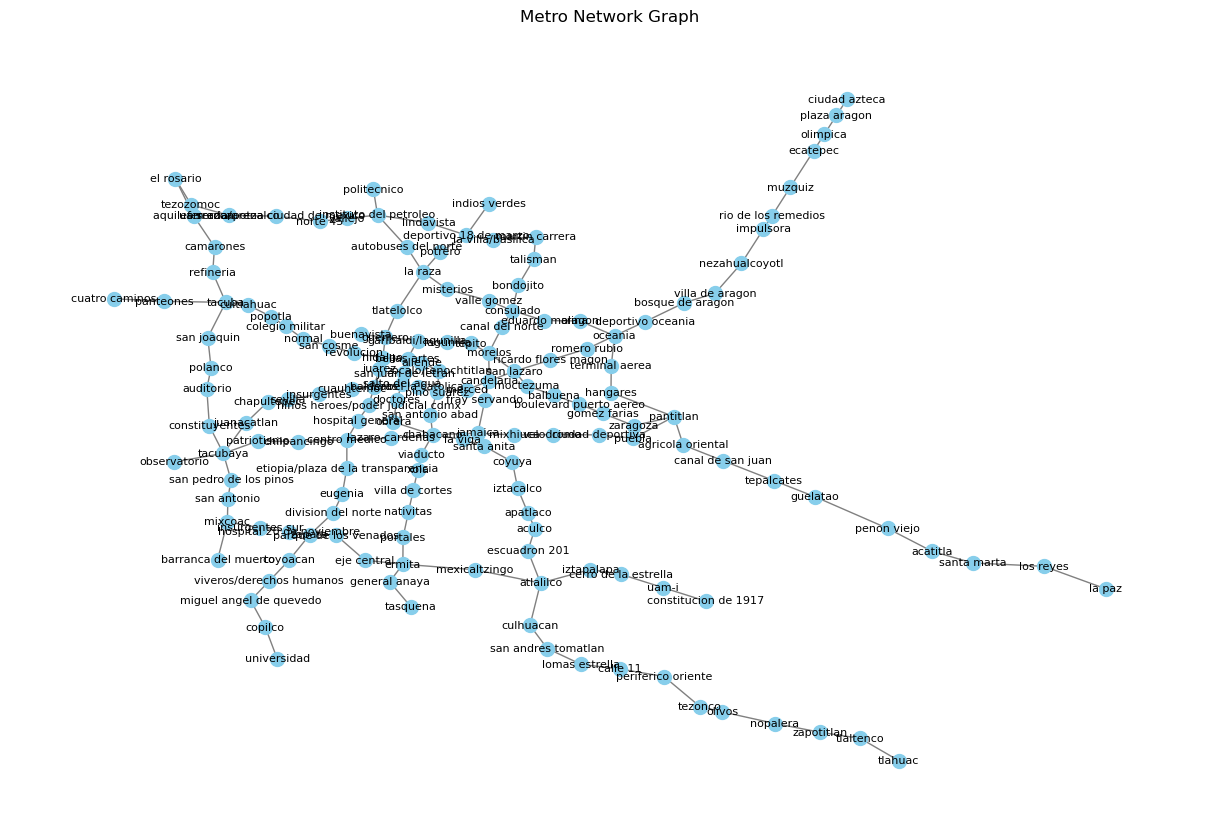

In [22]:
# Extraer posiciones de nodos desde las geometrías
positions = {
    node: (data['geometry'].x, data['geometry'].y)
    for node, data in metro_graph.nodes(data=True)
}

# Dibujar el grafo
plt.figure(figsize=(12, 8))
nx.draw(
    metro_graph,
    pos=positions,
    with_labels=True,
    node_size=100,
    node_color='skyblue',
    font_size=8,
    edge_color='gray'
)
plt.title("Metro Network Graph")
plt.show()

In [23]:
join_gdf.head()

,SISTEMA,NOMBRE,LINEA,EST,CVE_EST,CVE_EOD17,TIPO,ALCALDIAS,AÑO,geometry,longitude,latitude,estacion,afluencia
0,STC Metro,pantitlan,01,01,STC0101,05014,Terminal / Transbordo,Venustiano Carranza,1984,POINT Z (-99.07474 19.41633 0.00000),-99.074736,19.416334,pantitlan,3160.0
1,STC Metro,zaragoza,01,02,STC0102,05020,Intermedia,Venustiano Carranza,1969,POINT Z (-99.08229 19.41192 0.00000),-99.082289,19.411920,zaragoza,790.0
2,STC Metro,gomez farias,01,03,STC0103,05007,Intermedia,Venustiano Carranza,1969,POINT Z (-99.09021 19.41648 0.00000),-99.090210,19.416478,gomez farias,790.0
3,STC Metro,boulevard puerto aereo,01,04,STC0104,05003,Intermedia,Venustiano Carranza,1969,POINT Z (-99.09626 19.41994 0.00000),-99.096259,19.419942,boulevard puerto aereo,790.0
4,STC Metro,balbuena,01,05,STC0105,05001,Intermedia,Venustiano Carranza,1969,POINT Z (-99.10277 19.42336 0.00000),-99.102774,19.423355,balbuena,790.0


In [24]:
#metro_graph.nodes['STC0101']
#metro_graph.nodes['STCLA01']
#metro_graph.nodes['STCLA02']
metro_graph.nodes['pantitlan']

{'geometry': <POINT Z (-99.1 19.4 0)>,
 'afluencia': 3160.0,
 'SISTEMA': 'STC Metro',
 'LINEA': 'A',
 'EST': '01',
 'CVE_EST': 'STCLA01',
 'CVE_EOD17': '05171',
 'TIPO': 'Terminal / Transbordo',
 'ALCALDIAS': 'Iztacalco',
 'AÑO': 1991,
 'longitude': -99.07192293715731,
 'latitude': 19.415297524541934,
 'estacion': 'pantitlan'}

In [25]:
#for neighbor in metro_graph.neighbors("STCLA02"):
for neighbor in metro_graph.neighbors("pantitlan"):
    print(f"Vecino: {neighbor}, Afluencia: {metro_graph.nodes[neighbor]['afluencia']}")


Vecino: zaragoza, Afluencia: 790.0
Vecino: hangares, Afluencia: 790.0
Vecino: puebla, Afluencia: 790.0
Vecino: agricola oriental, Afluencia: 790.0


In [26]:
def plot_metro_network(G, node_attr='afluencia'):
    """
    Plots the metro network graph. Node size is proportional to the specified node attribute.

    Parameters:
        G (networkx.Graph): The NetworkX graph representing the metro network.
        node_attr (str): Node attribute to use for scaling node sizes (default: 'afluencia').
    """
    # Extraer posiciones de los nodos (latitud y longitud) usando 'geometry' del grafo
    pos = {node: (data['geometry'].x, data['geometry'].y) 
           for node, data in G.nodes(data=True)}

    # Extraer tamaño de los nodos proporcional al atributo 'afluencia'
    node_sizes = [data.get(node_attr, 100) for _, data in G.nodes(data=True)]
    
    # Ajustar tamaño de los nodos para que sea visible
    node_sizes = [size / 4 for size in node_sizes]  # Escalamiento simple

    # Configurar el gráfico
    plt.figure(figsize=(18, 12))
    nx.draw(
        G, 
        pos,
        with_labels=True,
        node_size=node_sizes,
        node_color='skyblue',
        font_size=8,
        edge_color='gray',
        alpha=0.7
    )
    
    # Título y leyenda
    plt.title("Metro Network Graph (Node Size ~ Afluencia)", fontsize=15)
    plt.show()

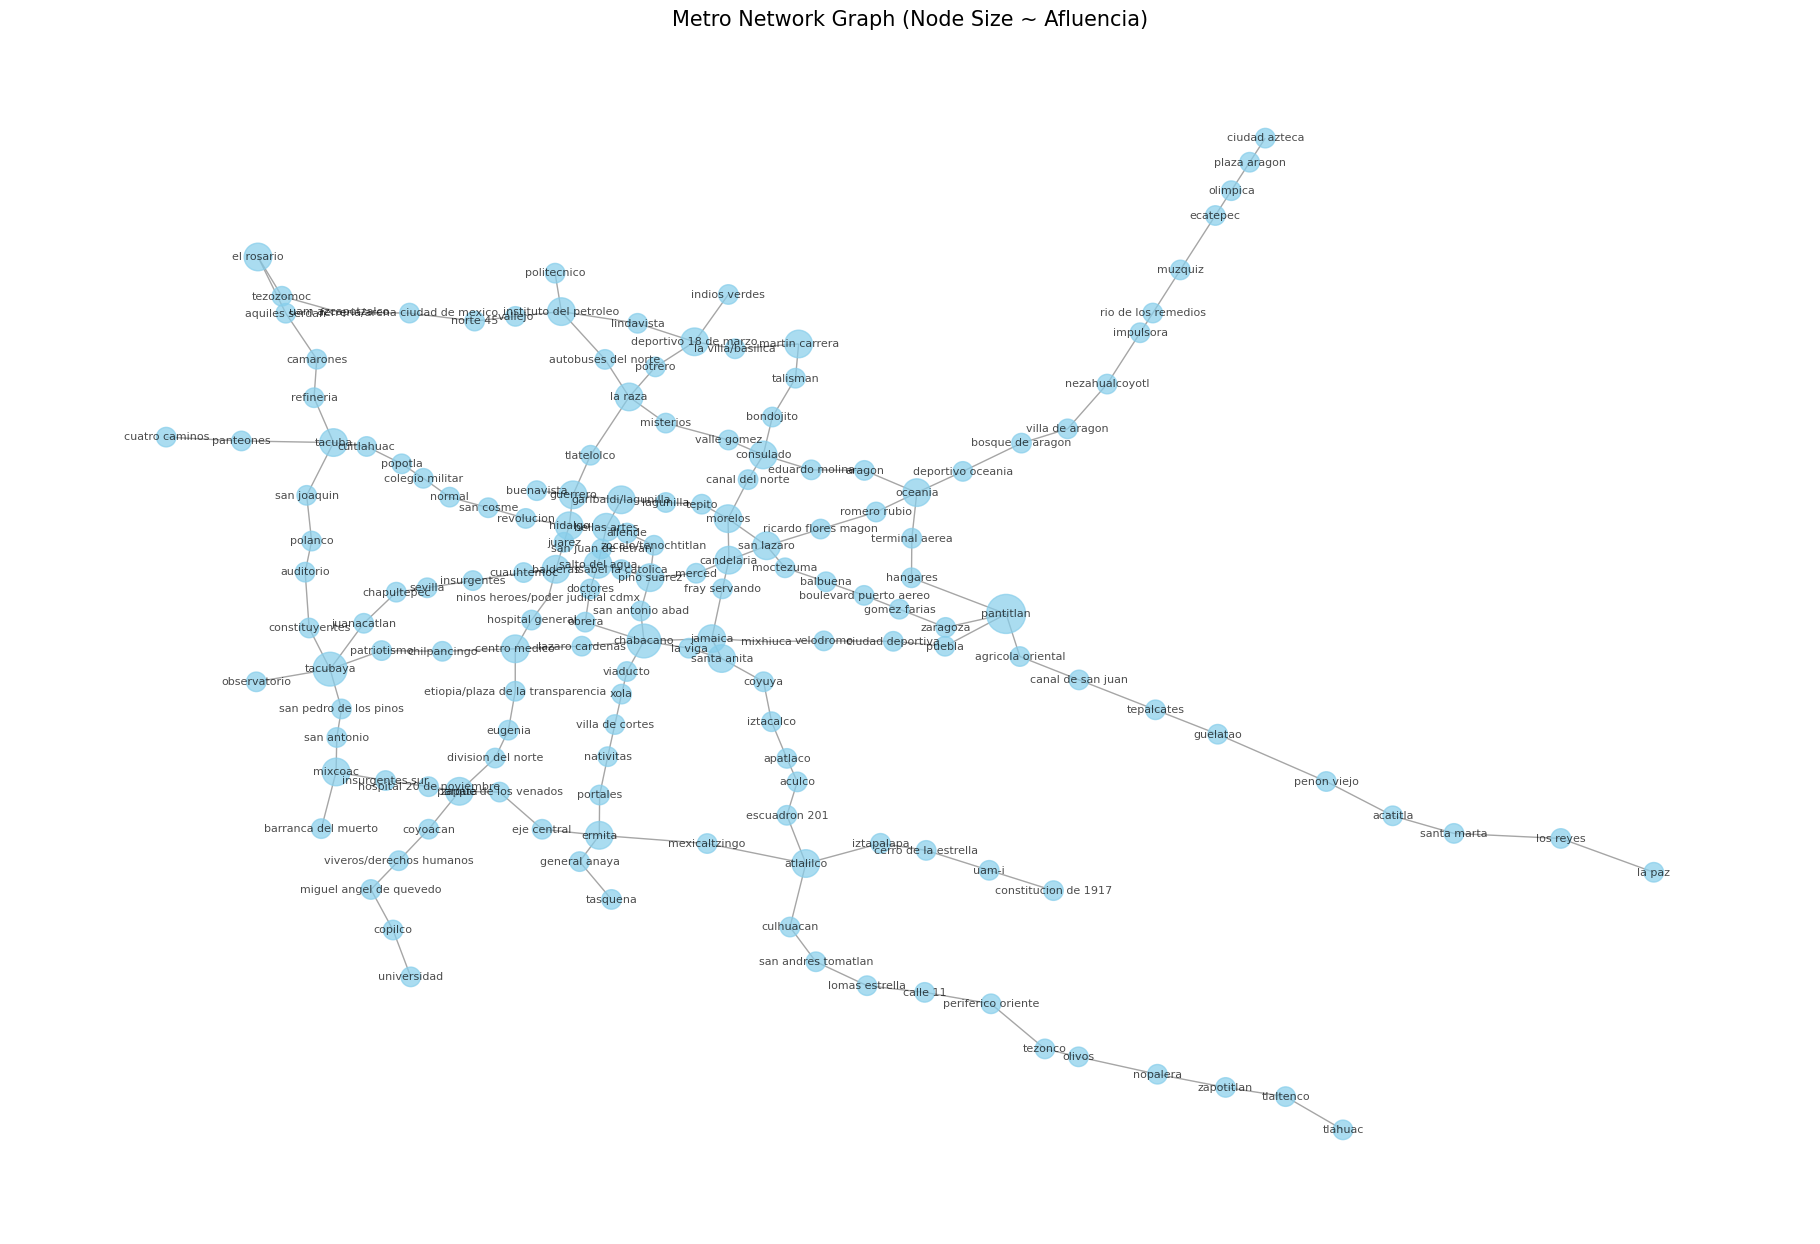

In [27]:
# Graficar el grafo
plot_metro_network(metro_graph, node_attr='afluencia')

In [28]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def calculate_and_plot_centralities(G, weight='weight'):
    """
    Calculate centralities and visualize the graph with node importance.
    
    Parameters:
        G (networkx.Graph): The NetworkX graph representing the metro network.
        weight (str): The edge attribute to use as a weight for calculations.
    """
    # 1. Calcular centralidades ponderadas
    closeness = nx.closeness_centrality(G, distance=weight)
    betweenness = nx.betweenness_centrality(G, weight=weight)
    eigenvector = nx.eigenvector_centrality_numpy(G, weight=weight)
    pagerank = nx.pagerank(G, weight=weight)

    # Agregar centralidades como atributos al grafo
    nx.set_node_attributes(G, closeness, 'closeness')
    nx.set_node_attributes(G, betweenness, 'betweenness')
    nx.set_node_attributes(G, eigenvector, 'eigenvector')
    nx.set_node_attributes(G, pagerank, 'pagerank')
    
    # 2. Graficar el grafo por importancia
    centralities = {'Closeness': closeness, 'Betweenness': betweenness, 
                    'Eigenvector': eigenvector, 'PageRank': pagerank}
    
    for name, centrality in centralities.items():
        # Escalar tamaños de nodos para visualización
        node_sizes = [v * 1000 for v in centrality.values()]
        
        # Crear mapa de colores para los nodos
        norm = Normalize(vmin=min(centrality.values()), vmax=max(centrality.values()))
        sm = ScalarMappable(cmap=plt.cm.viridis, norm=norm)
        sm.set_array([])  # Requerido para la barra de color

        # Posiciones de los nodos (pueden ser geográficas si se tienen)
        pos = {node: (data['geometry'].x, data['geometry'].y) 
               for node, data in G.nodes(data=True)}

        plt.figure(figsize=(12, 8))
        nx.draw(
            G, pos,
            with_labels=True,
            node_size=node_sizes,
            node_color=list(centrality.values()),
            cmap=plt.cm.viridis,
            edge_color='gray',
            alpha=0.8,
            font_size=8
        )
        
        # Añadir barra de colores
        cbar = plt.colorbar(sm, shrink=0.8)
        cbar.set_label(f'{name} Centrality', fontsize=12)

        # Título
        plt.title(f"{name} Centrality (Weighted)", fontsize=15)
        plt.show()

    # Retornar las centralidades calculadas
    return centralities

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

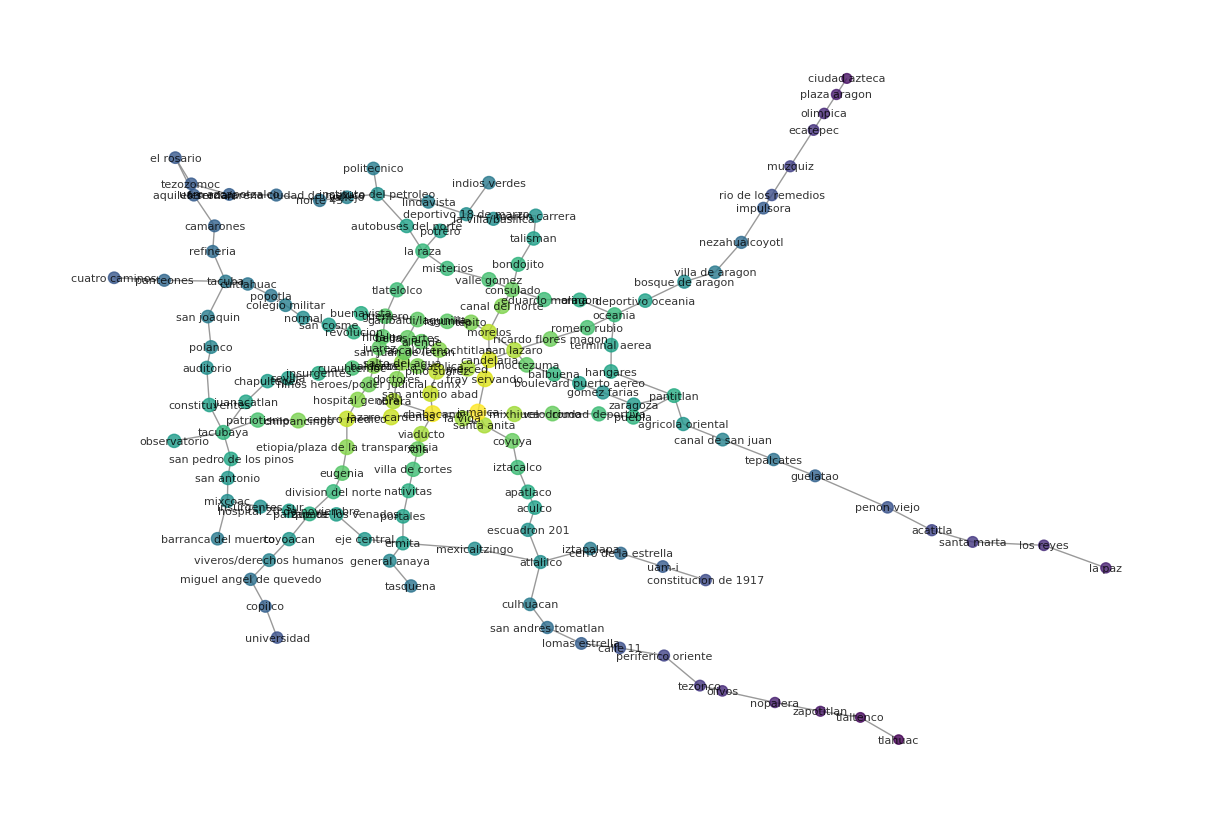

In [29]:
# Llamar la función para calcular y graficar centralidades
centralities = calculate_and_plot_centralities(metro_graph, weight='afluencia')

In [56]:
degree_centrality = nx.degree_centrality(metro_graph,)
betweenness_centrality = nx.betweenness_centrality(metro_graph,weight='afluencia',normalized=True)
closeness_centrality = nx.closeness_centrality(metro_graph, distance='afluencia')
#eigenvector_centrality = nx.eigenvector_centrality(metro_graph,weight='afluencia')
pagerank = nx.pagerank(metro_graph,weight='afluencia')
p_pagerank = nx.pagerank(metro_graph,weight='afluencia',personalization={'chabacano':1})

# Diccionario para almacenar resultados
centralities = {
    "Degree Centrality": degree_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Closeness Centrality": closeness_centrality,
    #"Eigenvector Centrality": eigenvector_centrality,
    "PageRank": pagerank,
    "Personalized PageRank": p_pagerank,
}

In [86]:
# Función para graficar
# Posición para graficar el grafo
pos = {node: (data['geometry'].x, data['geometry'].y) 
       for node, data in metro_graph.nodes(data=True)}

def plot_centrality(centrality, title):
    """
    Plots the graph with nodes sized and colored based on centrality values.
    
    Parameters:
        centrality (dict): Centrality values for each node.
        title (str): Title of the plot.
    """
    fig, ax = plt.subplots(figsize=(20, 12))  # Create figure and axis

    # 1. Calcular colores y tamaños de nodos basados en centralidad
    node_colors = [centrality[node] for node in metro_graph.nodes()]
    node_sizes = [centrality[node] * 2500 for node in metro_graph.nodes()]  # Ajusta escala del tamaño del nodo
    
    # 2. Dibujar nodos, aristas y etiquetas
    nx.draw_networkx_nodes(
        metro_graph, pos, 
        node_color=node_colors, cmap=plt.cm.viridis, 
        node_size=node_sizes, alpha=0.8, ax=ax
    )
    nx.draw_networkx_edges(metro_graph, pos, alpha=0.5, ax=ax)
    nx.draw_networkx_labels(
        metro_graph, pos, 
        font_color="black", font_size=8, ax=ax  # Reducir tamaño de letra
    )
    
    # 3. Crear barra de color
    sm = plt.cm.ScalarMappable(
        cmap=plt.cm.viridis, 
        norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors))
    )
    sm.set_array([])  # Requerido para el colorbar
    plt.colorbar(sm, label="Centrality Score", ax=ax)  # Asociar al eje actual

    # 4. Configuración final
    plt.title(title, fontsize=14)
    plt.axis("off")
    plt.show()


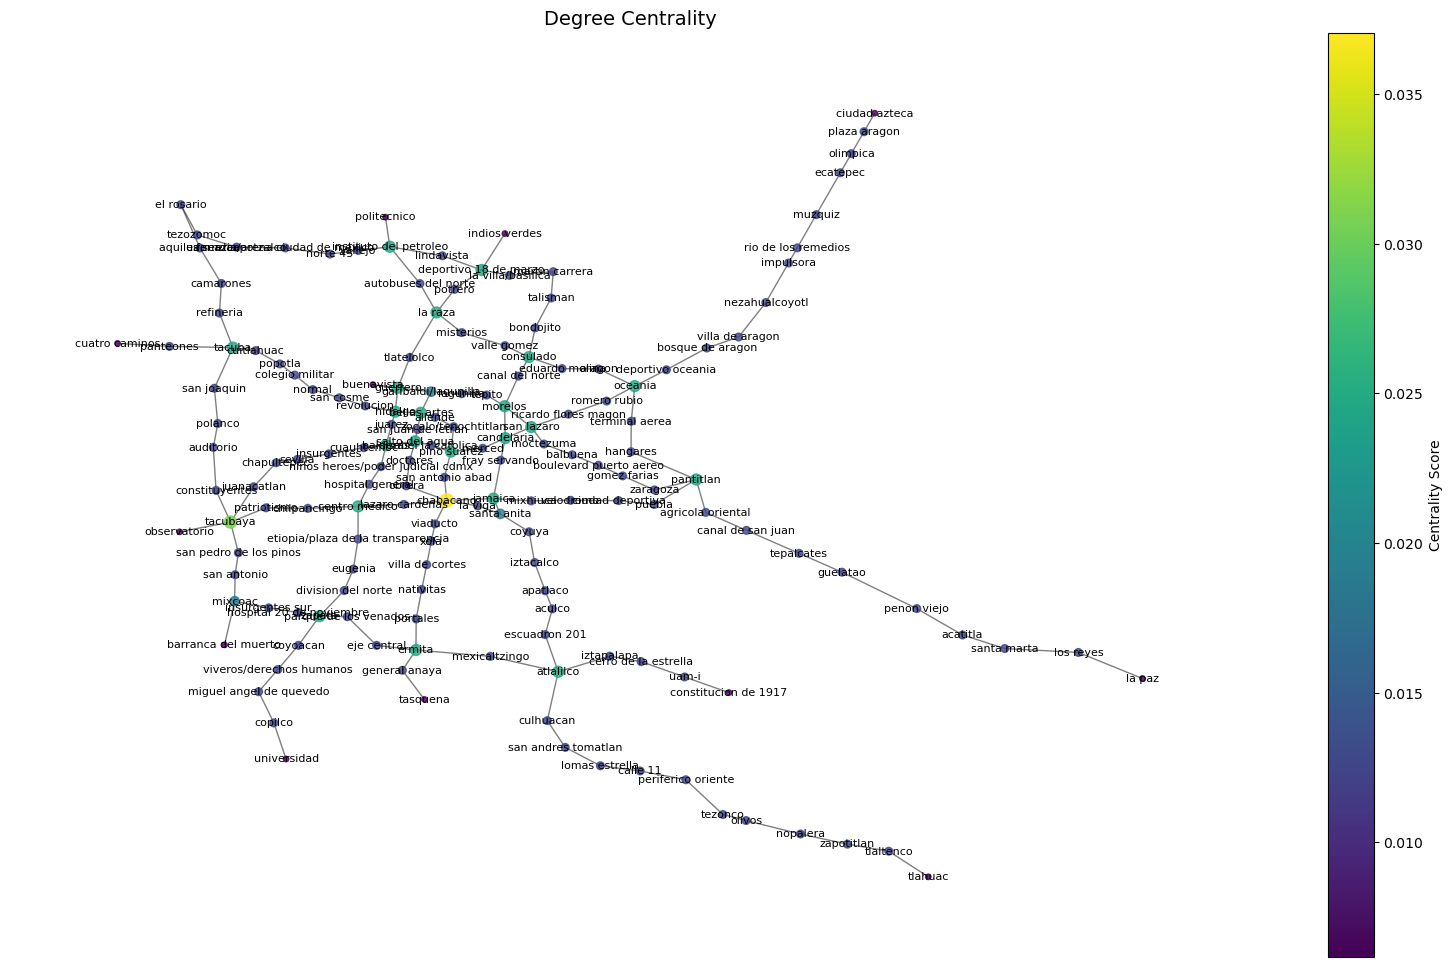

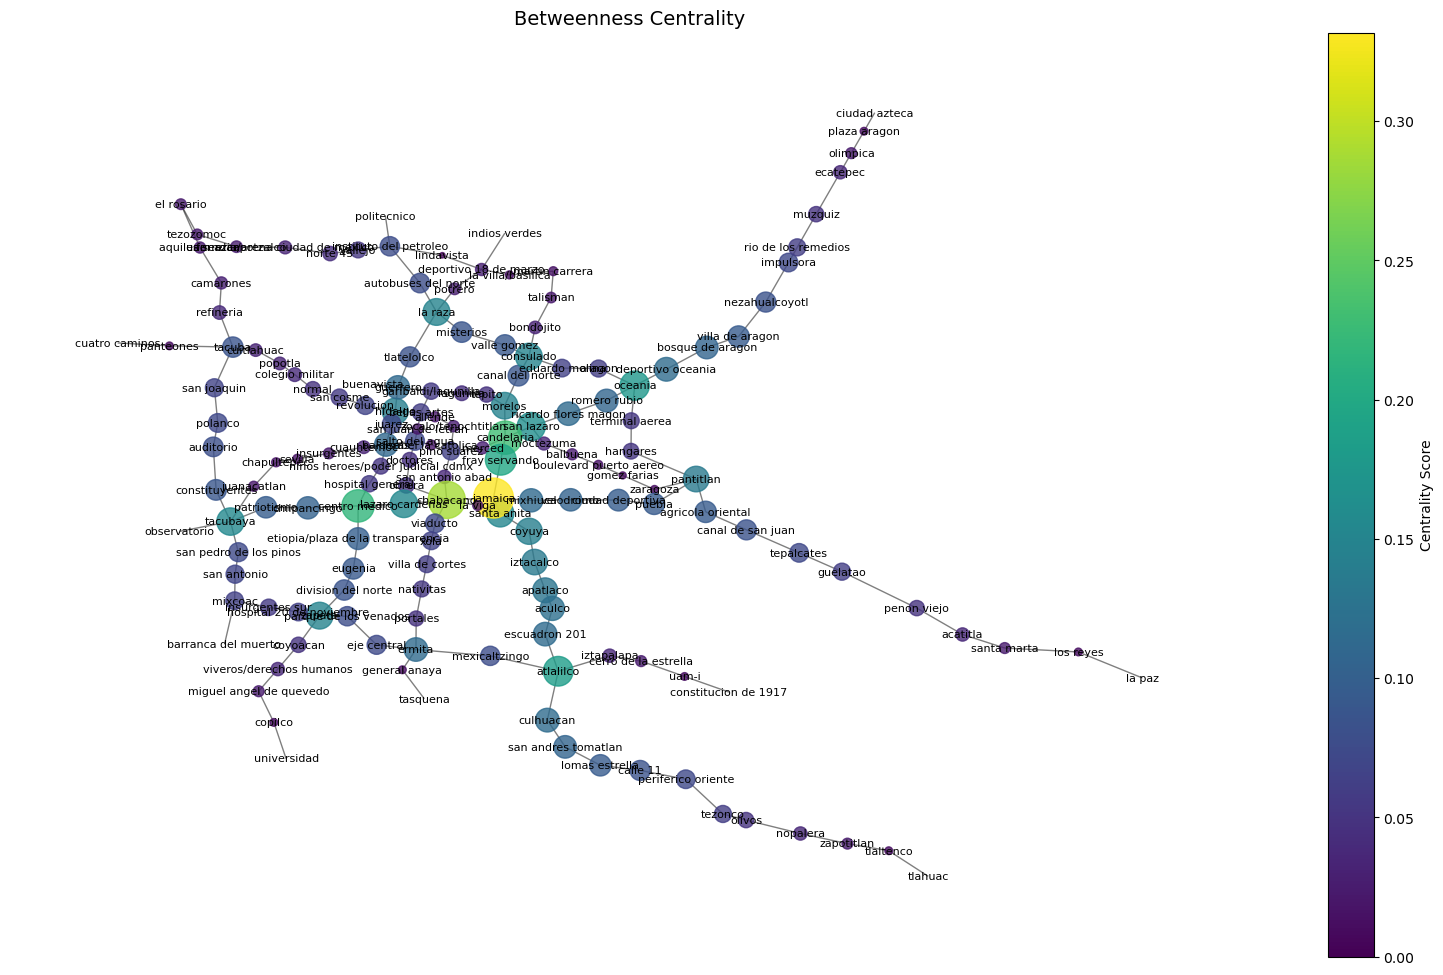

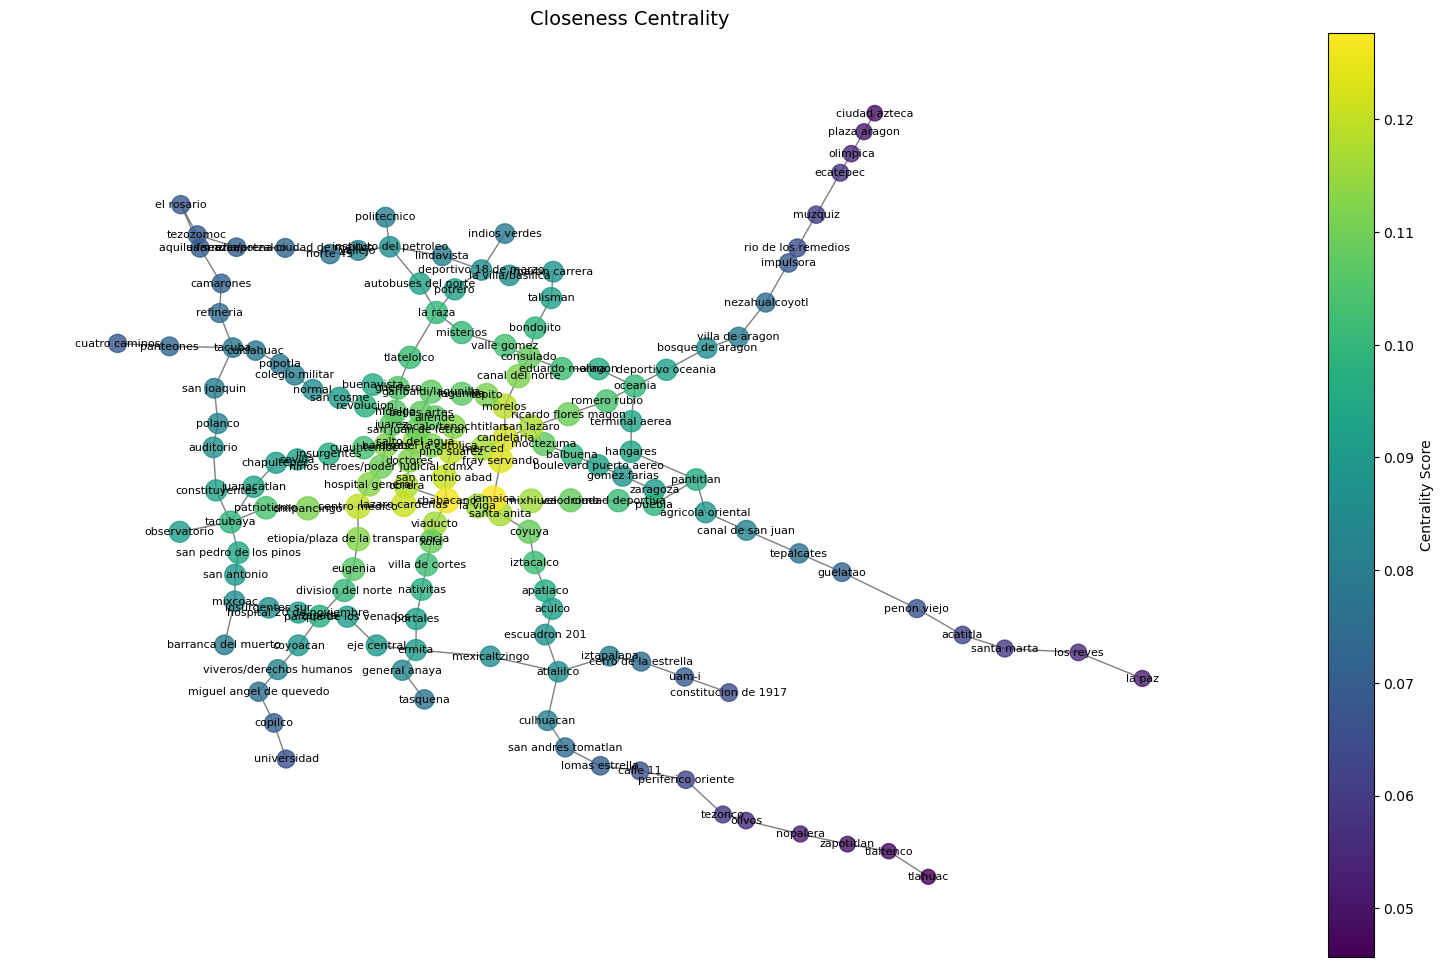

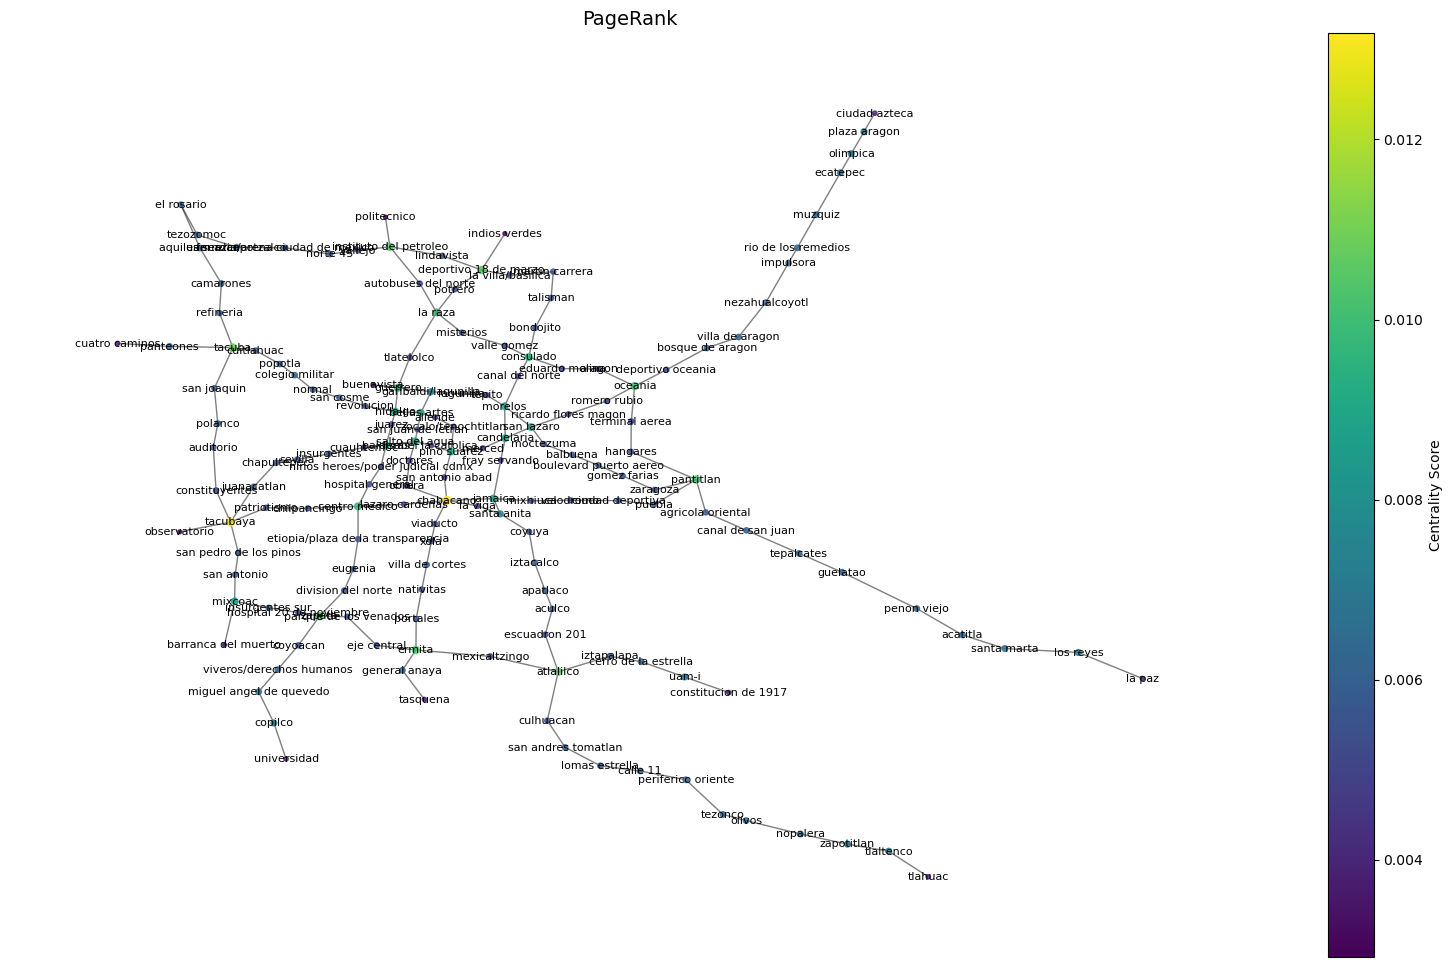

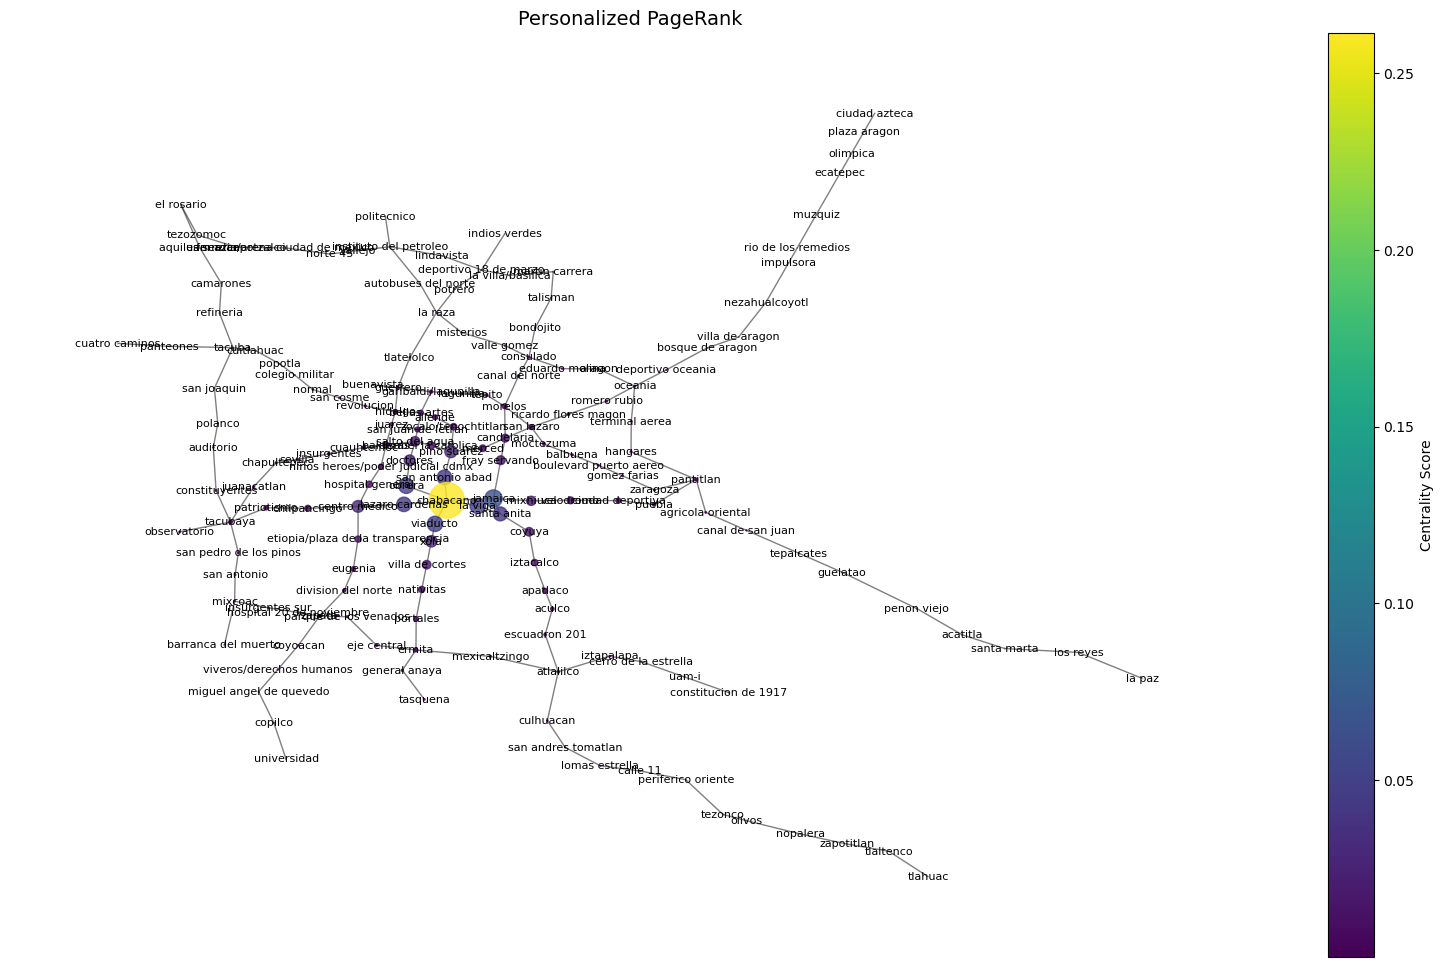

In [87]:
# Graficar cada centralidad
for centrality_name, centrality_scores in centralities.items():
    plot_centrality(centrality_scores, centrality_name)